![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/Training/multi_class_text_classification/NLU_training_multi_class_text_classifier_demo_amazon.ipynb)



# Training a Deep Learning Classifier with NLU 
## ClassifierDL (Multi-class Text Classification)
## 3 class Amazon Phone review classifier training]
With the [ClassifierDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#classifierdl-multi-class-text-classification) from Spark NLP you can achieve State Of the Art results on any multi class text classification problem 

This notebook showcases the following features : 

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)




You can achieve these results or even better on this dataset with training data:



<br>

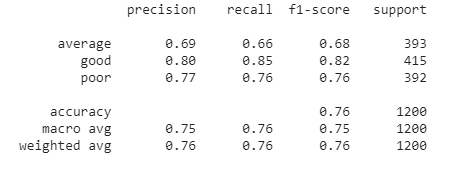


You can achieve these results or even better on this dataset with test data:


<br>


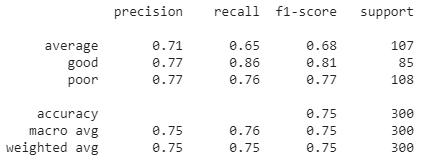

# 1. Install Java 8 and NLU

In [ ]:
!wget https://setup.johnsnowlabs.com/nlu/colab.sh -O - | bash
  

import nlu

--2021-05-05 05:24:08--  https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1671 (1.6K) [text/plain]
Saving to: ‘STDOUT’

-                     0%[                    ]       0  --.-KB/s               Installing  NLU 3.0.0 with  PySpark 3.0.2 and Spark NLP 3.0.1 for Google Colab ...
-                   100%[===================>]   1.63K  --.-KB/s    in 0.001s  

2021-05-05 05:24:08 (1.82 MB/s) - written to stdout [1671/1671]



# 2. Download Amazon Unlocked mobile phones dataset 
https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones

dataset with unlocked mobile phone reviews in 5 review classes


In [ ]:
! wget http://ckl-it.de/wp-content/uploads/2021/01/Amazon_Unlocked_Mobile.csv

--2021-05-05 05:24:40--  http://ckl-it.de/wp-content/uploads/2021/01/Amazon_Unlocked_Mobile.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 452621 (442K) [text/csv]
Saving to: ‘Amazon_Unlocked_Mobile.csv.1’

Amazon_Unlocked_Mob 100%[===================>] 442.01K   826KB/s    in 0.5s    

2021-05-05 05:24:40 (826 KB/s) - ‘Amazon_Unlocked_Mobile.csv.1’ saved [452621/452621]



In [ ]:
import pandas as pd
test_path = '/content/Amazon_Unlocked_Mobile.csv'
train_df = pd.read_csv(test_path,sep=",")
cols = ["y","text"]
train_df = train_df[cols]
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df



,y,text
42,poor,The product delivery was fast. I received it 4...
62,good,"My wife loves it, works great and easy to use."
411,poor,loved the phone. I've had it a month and last ...
197,average,It has missing part: Sim holder. I dont like t...
645,average,"Decent phone for the money, but if you are use..."
...,...,...
1147,poor,"the phone it is terrible ,got some pornovirus,..."
277,average,Phone worked great! Only issue was that it wou...
891,poor,"The phone worked very good the first month, th..."
675,average,I never used the phone. I ordered it and did n...


# 3. Train Deep Learning Classifier using nlu.load('train.classifier')

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [ ]:
# load a trainable pipeline by specifying the train. prefix  and fit it on a datset with label and text columns
# Since there are no

trainable_pipe = nlu.load('train.classifier')
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50] )


# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50] ,output_level='document')
preds

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


,origin_index,y,document,sentence,trained_classifier,text,sentence_embedding_use,trained_classifier_confidence_confidence
0,1045,good,excelente,[excelente],good,excelente,"[0.032463133335113525, -0.01719777286052704, -...",0.688769
1,501,good,Good tanks,[Good tanks],good,Good tanks,"[-0.04523428902029991, -0.0027615062426775694,...",0.671200
2,539,poor,My charger does not work.I would like one that...,"[My charger does not work., I would like one t...",average,My charger does not work.I would like one that...,"[0.05880051478743553, 0.07787849009037018, -0....",0.964706
3,1073,poor,Positive: Large screen is good for senior peop...,[Positive: Large screen is good for senior peo...,average,Positive: Large screen is good for senior peop...,"[0.06194938346743584, 0.046952128410339355, -0...",0.896623
4,191,good,works good for 3G and above. Simple to use. No...,"[works good for 3G and above., Simple to use.,...",good,works good for 3G and above. Simple to use. No...,"[0.07321183383464813, 0.023221753537654877, -0...",0.657733
5,237,average,Well is a old model and they work just fine no...,[Well is a old model and they work just fine n...,average,Well is a old model and they work just fine no...,"[0.08121286332607269, 0.07176794856786728, -0....",0.801204
6,1357,poor,Phone is cheap...only had it for 3-5 months n ...,"[Phone is cheap., ..only had it for 3-5 months...",average,Phone is cheap...only had it for 3-5 months n ...,"[0.024805108085274696, 0.0025309964548796415, ...",0.644998
7,543,good,these work nice for the price and that is why ...,[these work nice for the price and that is why...,good,these work nice for the price and that is why ...,"[0.02607562020421028, -0.0069553907960653305, ...",0.733167
8,947,poor,was not what they say good luck getting it to ...,[was not what they say good luck getting it to...,good,was not what they say good luck getting it to ...,"[-0.0032445385586470366, 0.02947022207081318, ...",0.481921
9,1178,good,Just what we needed for an older relative.,[Just what we needed for an older relative.],good,Just what we needed for an older relative.,"[0.02692161314189434, -0.06281831860542297, -0...",0.641099


# 4. Test the fitted pipe on new example

In [ ]:
fitted_pipe.predict("It worked perfectly .")

,origin_index,document,sentence,trained_classifier,sentence_embedding_use,trained_classifier_confidence_confidence
0,0,It worked perfectly .,[It worked perfectly .],average,"[0.01656321808695793, 0.0024238349869847298, -...",0.746443


## 5. Configure pipe training parameters

In [ ]:
trainable_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['classifier_dl'] has settable params:
pipe['classifier_dl'].setMaxEpochs(3)                | Info: Maximum number of epochs to train | Currently set to : 3
pipe['classifier_dl'].setLr(0.005)                   | Info: Learning Rate | Currently set to : 0.005
pipe['classifier_dl'].setBatchSize(64)               | Info: Batch size | Currently set to : 64
pipe['classifier_dl'].setDropout(0.5)                | Info: Dropout coefficient | Currently set to : 0.5
pipe['classifier_dl'].setEnableOutputLogs(True)      | Info: Whether to use stdout in addition to Spark logs. | Currently set to : True
>>> pipe['use@tfhub_use'] has settable params:
pipe['use@tfhub_use'].setDimension(512)              | Info: Number of embedding dimensions | Currently set to : 512
pipe['use@tfhub_use'].setLoadSP(False)               | Info: Whether to load SentencePiece ops file which is required only by multi

## 6.  Retrain with new parameters

In [ ]:
# Train longer!
trainable_pipe = nlu.load('train.classifier')
trainable_pipe['trainable_multi_classifier_dl'].setMaxEpochs(5)  
fitted_pipe = trainable_pipe.fit(train_df.iloc[:100])
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:100],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
from sklearn.metrics import classification_report
print(classification_report(preds['y'], preds['classifier_dl']))
preds

              precision    recall  f1-score   support

     average       0.00      0.00      0.00        33
        good       0.65      0.97      0.78        36
        poor       0.57      0.84      0.68        31

    accuracy                           0.61       100
   macro avg       0.40      0.60      0.48       100
weighted avg       0.41      0.61      0.49       100



,origin_index,y,document,sentence,trained_classifier,text,sentence_embedding_use,trained_classifier_confidence_confidence
0,1045,good,excelente,[excelente],good,excelente,"[0.032463133335113525, -0.01719777286052704, -...",0.981568
1,501,good,Good tanks,[Good tanks],good,Good tanks,"[-0.04523428902029991, -0.0027615062426775694,...",0.949588
2,539,poor,My charger does not work.I would like one that...,"[My charger does not work., I would like one t...",poor,My charger does not work.I would like one that...,"[0.05880051478743553, 0.07787849009037018, -0....",0.827465
3,1073,poor,Positive: Large screen is good for senior peop...,[Positive: Large screen is good for senior peo...,poor,Positive: Large screen is good for senior peop...,"[0.06194938346743584, 0.046952128410339355, -0...",0.659105
4,191,good,works good for 3G and above. Simple to use. No...,"[works good for 3G and above., Simple to use.,...",good,works good for 3G and above. Simple to use. No...,"[0.07321183383464813, 0.023221753537654877, -0...",0.833691
...,...,...,...,...,...,...,...,...
95,276,average,Average phone with very buggy performance,[Average phone with very buggy performance],poor,Average phone with very buggy performance,"[0.02227046899497509, -0.027068903669714928, -...",0.652539
96,984,good,Great simple to use phone for my mother. Big b...,"[Great simple to use phone for my mother., Big...",good,Great simple to use phone for my mother. Big b...,"[0.05902329087257385, 0.039018064737319946, 0....",0.956777
97,1054,good,My husband loves it!! It is simple to use with...,"[My husband loves it!!, It is simple to use wi...",good,My husband loves it!! It is simple to use with...,"[0.05941574648022652, -0.00272793835029006, -0...",0.960578
98,1153,poor,This phone sucks the data is terrible if you h...,[This phone sucks the data is terrible if you ...,poor,This phone sucks the data is terrible if you h...,"[0.05509388446807861, 0.005729800555855036, -0...",0.905695


#7. Try training with different Embeddings

In [ ]:
# We can use nlu.print_components(action='embed_sentence') to see every possibler sentence embedding we could use. Lets use bert!
nlu.print_components(action='embed_sentence')

For language <en> NLU provides the following Models : 
nlu.load('en.embed_sentence') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.tfhub_use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.tfhub_use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.albert') returns Spark NLP model albert_base_uncased
nlu.load('en.embed_sentence.electra') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_small_uncased') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_base_uncased') returns Spark NLP model sent_electra_base_uncased
nlu.load('en.embed_sentence.electra_large_uncased') returns Spark NLP model sent_electra_large_uncased
nlu.load('en.embed_sentence.bert') returns Spark NLP model sent_bert_base_uncased
nlu.load('en.embed_sentenc

In [ ]:
trainable_pipe = nlu.load('en.embed_sentence.small_bert_L12_768 train.classifier')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['trainable_classifier_dl'].setMaxEpochs(90)  
trainable_pipe['trainable_classifier_dl'].setLr(0.0005) 
fitted_pipe = trainable_pipe.fit(train_df)
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
from sklearn.metrics import classification_report
print(classification_report(preds['y'], preds['classifier_dl']))

#preds


sent_small_bert_L12_768 download started this may take some time.
Approximate size to download 392.9 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]
              precision    recall  f1-score   support

     average       0.69      0.66      0.68       393
        good       0.80      0.85      0.82       415
        poor       0.77      0.76      0.76       392

    accuracy                           0.76      1200
   macro avg       0.75      0.76      0.75      1200
weighted avg       0.76      0.76      0.76      1200



# 7.1 evaluate on Test Data

In [ ]:
preds = fitted_pipe.predict(test_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['classifier_dl']))

              precision    recall  f1-score   support

     average       0.71      0.65      0.68       107
        good       0.77      0.86      0.81        85
        poor       0.77      0.76      0.77       108

    accuracy                           0.75       300
   macro avg       0.75      0.76      0.75       300
weighted avg       0.75      0.75      0.75       300



# 8. Lets save the model

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
fitted_pipe.save(stored_model_path)

Stored model in ./model/classifier_dl_trained


# 9. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [ ]:
hdd_pipe = nlu.load(path=stored_model_path)

preds = hdd_pipe.predict('It worked perfectly.')
preds

,origin_index,from_disk_confidence_confidence,text,sentence_embedding_from_disk,from_disk,document,sentence
0,8589934592,[0.8648654],It worked perfectly.,"[[0.27597182989120483, 0.4924651086330414, 0.2...",[good],It worked perfectly.,[It worked perfectly.]


In [ ]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['document_assembler'] has settable params:
pipe['document_assembler'].setCleanupMode('shrink')                                     | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'] has settable params:
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setExplodeSentences(False)  | Info: whether to explode each sentence into a different row, for better parallelization. Defaults to false. | Currently set to : False
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setStorageRef('SentenceDetectorDLModel_c83c27f46b97')  | Info: storage unique identifier | Currently set to : SentenceDetectorDLModel_c83c27f46b97
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setEncoder(com.johnsnowlabs.nlp.ann